**Name:** Sparsh Verma

**Roll no.:** 702330001

**Group:** 2G1A

**Email:** sverma_be23@thapar.edu

# **Q-1**

Given the following undirected graph, perform a BFS as well as DFS starting from vertex A. List the order in which the vertices are visited.

{
A
−
B
,
A
−
C
,
B
−
D
,
C
−
D
,
D
−
E
}
{A−B,A−C,B−D,C−D,D−E}

# Output:

BFS and DFS on Undirected Graph

BFS Order: A → B → C → D → E

* BFS explores level by level, visiting all neighbors before moving deeper.

DFS Order: A → B → D → E → C (or A → C → D → E → B)

* DFS explores as deep as possible before backtracking.

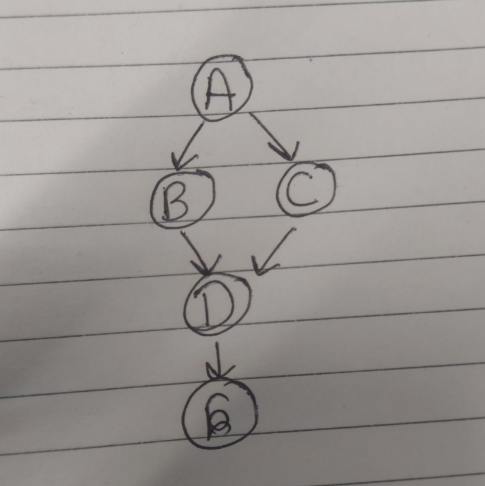

# **Q-2**

Given the following directed graph, algorithmically determine if it is a DAG. If it is not, explain why.

{
A
→
B
,
B
→
C
,
C
→
A
,
B
→
D
}
{A→B,B→C,C→A,B→D}

# Output:

**Checking if Graph is a DAG**

**Cycle Found:** A → B → C → A

* A graph with a cycle cannot be a Directed Acyclic Graph (DAG).

**Conclusion:** Not a DAG

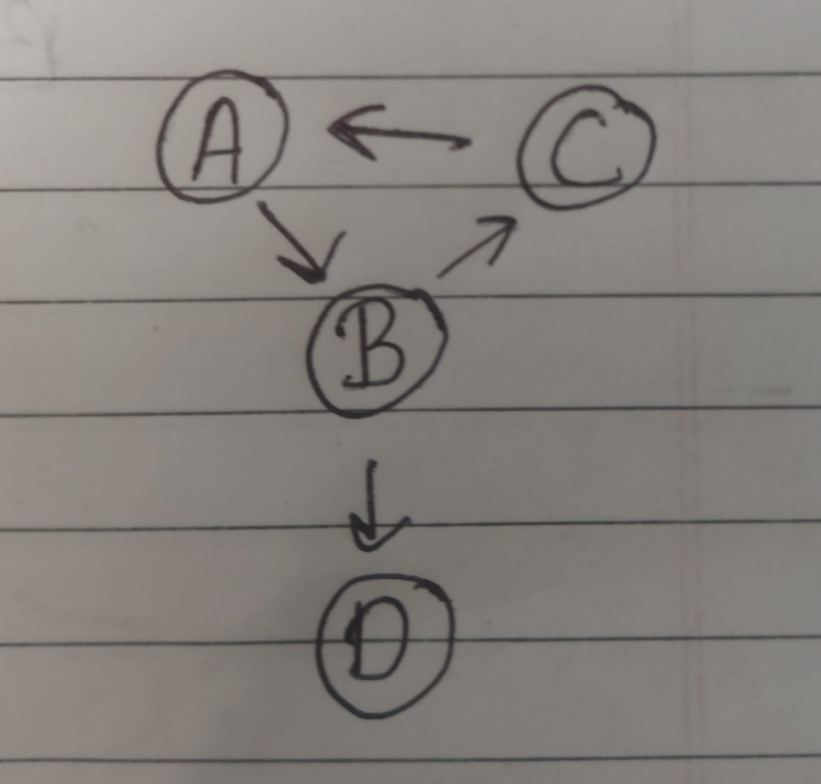

# **Q-3**

Given the following DAG, algorithmically perform a topological sort.

{
A
→
B
,
A
→
C
,
B
→
D
,
C
→
D
}
{A→B,A→C,B→D,C→D}

# Output:

**Topological Order:** A → B → C → D (or A → C → B → D)

* Topological sorting orders nodes such that each directed edge points from earlier to later in the order.

# **Q-4**

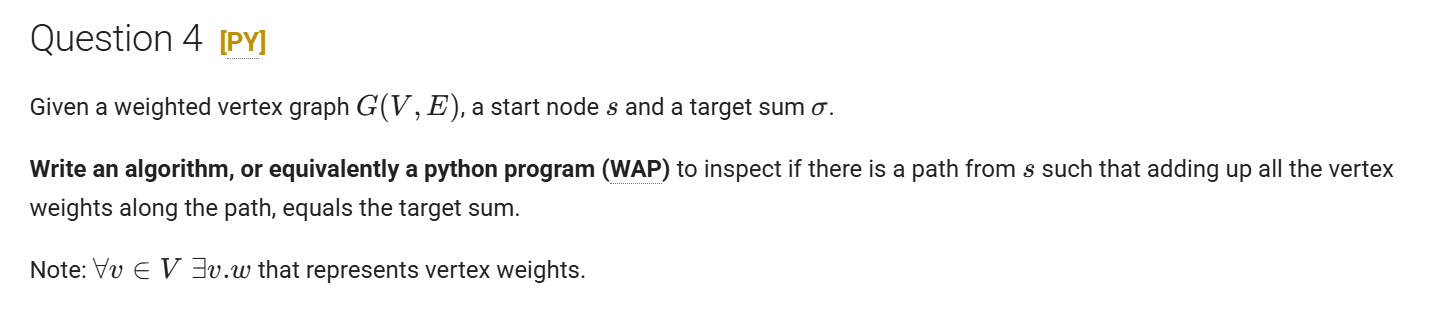

In [ ]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
        self.weights = {}  # Stores vertex weights

    def add_edge(self, u, v):
        """ Adds an edge between u and v """
        self.graph[u].append(v)
        self.graph[v].append(u)  # Assuming an undirected graph

    def set_weight(self, v, w):
        """ Sets weight for vertex v """
        self.weights[v] = w

    def path_with_target_sum(self, start, target):
        """ DFS to find a path where vertex weights sum to target """
        def dfs(node, current_sum, visited):
            if current_sum == target:
                return True
            if current_sum > target:
                return False  # Stop if sum exceeds target

            visited.add(node)
            for neighbor in self.graph[node]:
                if neighbor not in visited:
                    if dfs(neighbor, current_sum + self.weights[neighbor], visited):
                        return True
            visited.remove(node)  # Backtrack
            return False

        return dfs(start, self.weights[start], set())

# Example Usage:
g = Graph()
g.add_edge(1, 2)
g.add_edge(1, 3)
g.add_edge(2, 4)
g.add_edge(3, 5)

# Assign vertex weights
g.set_weight(1, 5)
g.set_weight(2, 3)
g.set_weight(3, 2)
g.set_weight(4, 7)
g.set_weight(5, 4)

start_node = 1
target_sum = 10
print(g.path_with_target_sum(start_node, target_sum))  # Output: True or False


False


**Explanation:**

* Keep track of the cumulative sum of vertex weights along the path.
* Backtrack when the sum exceeds the target
𝜎
σ or when no valid path remains.
* If a valid path summing to
𝜎
σ is found, we return True.

# **Q-6**

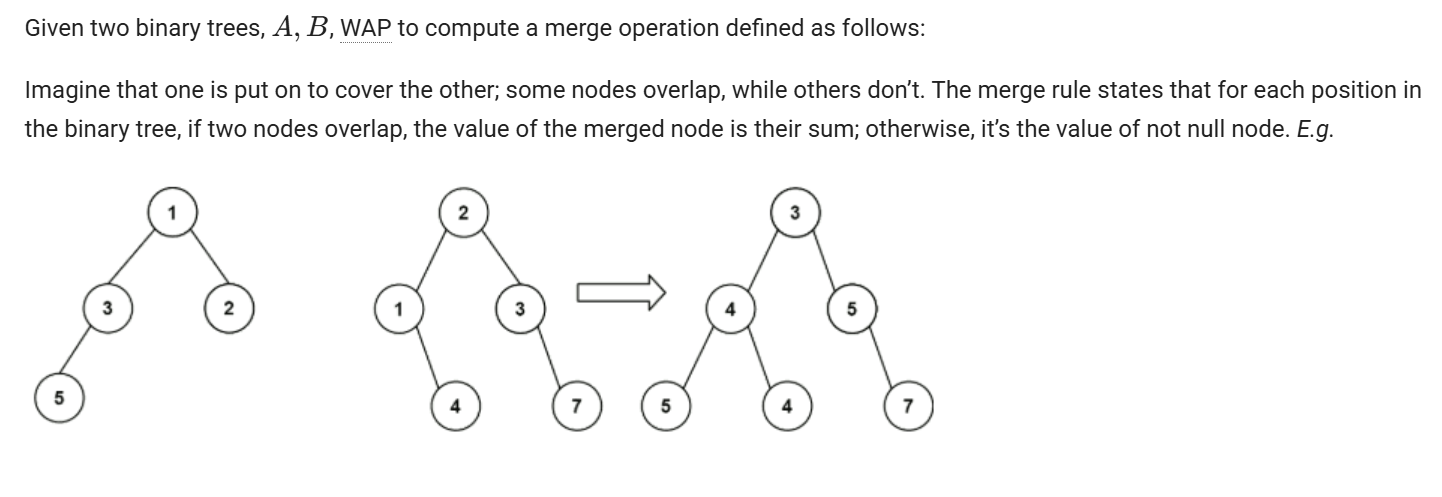

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def merge_trees(A, B):
    # If one of the trees is empty, return the non-null tree
    if not A:
        return B
    if not B:
        return A

    # Merge current nodes
    merged_root = TreeNode(A.val + B.val)

    # Recursively merge left and right subtrees
    merged_root.left = merge_trees(A.left, B.left)
    merged_root.right = merge_trees(A.right, B.right)

    return merged_root

# Helper function to print tree (Level Order Traversal)
from collections import deque

def print_tree(root):
    if not root:
        return "Empty Tree"
    queue = deque([root])
    result = []
    while queue:
        node = queue.popleft()
        if node:
            result.append(str(node.val))
            queue.append(node.left)
            queue.append(node.right)
        else:
            result.append("None")
    return " -> ".join(result)

# Example Trees
A = TreeNode(1, TreeNode(3, TreeNode(5)), TreeNode(2))
B = TreeNode(2, TreeNode(1, None, TreeNode(4)), TreeNode(3, None, TreeNode(7)))

merged_tree = merge_trees(A, B)
print(print_tree(merged_tree))


3 -> 4 -> 5 -> 5 -> 4 -> None -> 7 -> None -> None -> None -> None -> None -> None


##Q-9
Given an image M ∈ Z H × W M∈Z H×W represented as a grid (or matrix) of H × W H×W of integers, where m i j m ij ​ represents the pixel value of i i-th row, j j-th column.

1) WAP to flood-fill colour κ κ starting at pixel at r r-th row and c c-th column.

2) Reflect on the relative merits of using BFS/DFS for the process.

In [ ]:
from collections import deque

def flood_fill_dfs(image, r, c, new_color, original_color=None):
    if original_color is None:
        original_color = image[r][c]

    if r < 0 or r >= len(image) or c < 0 or c >= len(image[0]) or image[r][c] != original_color or image[r][c] == new_color:
        return

    image[r][c] = new_color

    # Recursive DFS call in 4 directions
    flood_fill_dfs(image, r+1, c, new_color, original_color)
    flood_fill_dfs(image, r-1, c, new_color, original_color)
    flood_fill_dfs(image, r, c+1, new_color, original_color)
    flood_fill_dfs(image, r, c-1, new_color, original_color)

def flood_fill_bfs(image, r, c, new_color):
    original_color = image[r][c]
    if original_color == new_color:
        return

    queue = deque([(r, c)])
    while queue:
        x, y = queue.popleft()
        if 0 <= x < len(image) and 0 <= y < len(image[0]) and image[x][y] == original_color:
            image[x][y] = new_color
            queue.extend([(x+1, y), (x-1, y), (x, y+1), (x, y-1)])

# Example usage:
image = [
    [1, 1, 0, 0],
    [1, 0, 0, 1],
    [1, 1, 1, 1]
]

r, c, new_color = 1, 1, 2  # Start at (1,1) and change color to 2

print("Before:")
for row in image:
    print(row)

flood_fill_dfs(image, r, c, new_color)

print("\nAfter DFS:")
for row in image:
    print(row)

# Reset image for BFS
image = [
    [1, 1, 0, 0],
    [1, 0, 0, 1],
    [1, 1, 1, 1]
]

flood_fill_bfs(image, r, c, new_color)

print("\nAfter BFS:")
for row in image:
    print(row)


Before:
[1, 1, 0, 0]
[1, 0, 0, 1]
[1, 1, 1, 1]

After DFS:
[1, 1, 2, 2]
[1, 2, 2, 1]
[1, 1, 1, 1]

After BFS:
[1, 1, 2, 2]
[1, 2, 2, 1]
[1, 1, 1, 1]


**Explanation:**

* This function performs a Depth-First Search (DFS) to fill connected pixels of the same color with a new color, starting from a given pixel.

* It ensures that each connected area of the same color is updated correctly.

* If the pixel is already of the new color, the function simply returns the original image.


# **Q-11**

Given a full binary tree B such that,

*Leaf nodes bear binary truth values, i.e. True or False;
*Non leaf nodes bear values that represent logic gates, namely AND or OR.

WAP to evaluate the boolean binary tree B and return the result

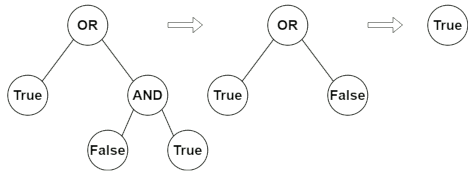

In [ ]:
class TreeNode:
    def __init__(self, val, left=None, right=None):
        self.val = val  # Can be "AND", "OR", True, or False
        self.left = left
        self.right = right

def evaluate_boolean_tree(root):
    if root is None:
        return False  # Edge case: Empty tree (optional)

    # If it's a leaf node, return the boolean value
    if root.val is True or root.val is False:
        return root.val

    # Evaluate left and right subtrees
    left_val = evaluate_boolean_tree(root.left)
    right_val = evaluate_boolean_tree(root.right)

    # Apply the logical operation
    if root.val == "AND":
        return left_val and right_val
    elif root.val == "OR":
        return left_val or right_val
    else:
        raise ValueError("Invalid operator in tree")

root = TreeNode("OR",
    TreeNode(True),
    TreeNode("AND", TreeNode(False), TreeNode(True))
)

print(evaluate_boolean_tree(root))  # Output: True

True


# **Q-12**

Given a binary rectangular grid
M
∈
{
0
,
1
}
H
×
W
M∈{0,1}
H×W
  with
H
H rows and
W
W columns, where each pixel
m
i
j
m
ij
​
  represents either
0
0 for water or
1
1 for land. Assume that

* There’s exactly one island (contiguously connected land cells);
* Pixels are connected either vertically or horizontally but not diagonally; and
* There are no lakes.

WAP to determine the perimeter of the island!

In [ ]:
def island_perimeter(grid):
    H, W = len(grid), len(grid[0])
    perimeter = 0

    for i in range(H):
        for j in range(W):
            if grid[i][j] == 1:  # Land cell
                perimeter += 4  # Start with 4 edges

                # Check adjacent cells and subtract shared edges
                if i > 0 and grid[i-1][j] == 1:  # Check above
                    perimeter -= 2
                if j > 0 and grid[i][j-1] == 1:  # Check left
                    perimeter -= 2

    return perimeter
# Example usage:
grid = [
    [0, 1, 0, 0],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [1, 1, 0, 0]
]

print(island_perimeter(grid))  # Output: 16


16


**Explanation:**

* Each land cell (1) initially contributes 4 to the perimeter.
* If it has a neighbor (1) above or left, we subtract 2 per shared edge.
* The final perimeter is computed efficiently in a single pass (O(H×W) time complexity).

# **Q-13**

Given
N
N courses labelled
{
0
,
…
,
N
−
1
}
{0,…,N−1} and a list of prerequisites
R
R such that the courses
R
[
i
]
≡
{
a
i
,
b
i
,
…
}
R[i]≡{a
i
​
 ,b
i
​
 ,…} are required to be completed before enrolling for
i
i-th course.

WAP to determine if all the
N
N courses can be completed successfully by a candidate. If so, also determine one of the feasible ordering of courses.

In [ ]:
from collections import deque

def can_complete_courses(N, prerequisites):
    # Step 1: Build adjacency list & in-degree array
    graph = {i: [] for i in range(N)}
    in_degree = {i: 0 for i in range(N)}

    for course, prereqs in enumerate(prerequisites):
        for prereq in prereqs:
            graph[prereq].append(course)  # Directed edge prereq → course
            in_degree[course] += 1

    # Step 2: Find nodes with in-degree 0
    queue = deque([node for node in range(N) if in_degree[node] == 0])
    order = []

    # Step 3: Process courses using BFS
    while queue:
        node = queue.popleft()
        order.append(node)

        for neighbor in graph[node]:
            in_degree[neighbor] -= 1
            if in_degree[neighbor] == 0:
                queue.append(neighbor)

    # If all courses are included in the order, return it; otherwise, return failure
    return order if len(order) == N else None

# Example Usage:
N1, R1 = 2, [[], [0]]  # Output: [0, 1]
N2, R2 = 2, [[1], [0]]  # Output: None (cycle detected)

print(can_complete_courses(N1, R1))  # Output: [0, 1]
print(can_complete_courses(N2, R2))  # Output: None (Impossible)


[0, 1]
None


**Explanation:**

* Graph Construction

  {0: [], 1: [0]} → Course 1 depends on 0.
* Topological Sort (BFS)

  Start with 0, then 1.
* Cycle Detection

  If all N nodes aren't processed, a cycle exists.

# **Q-15**

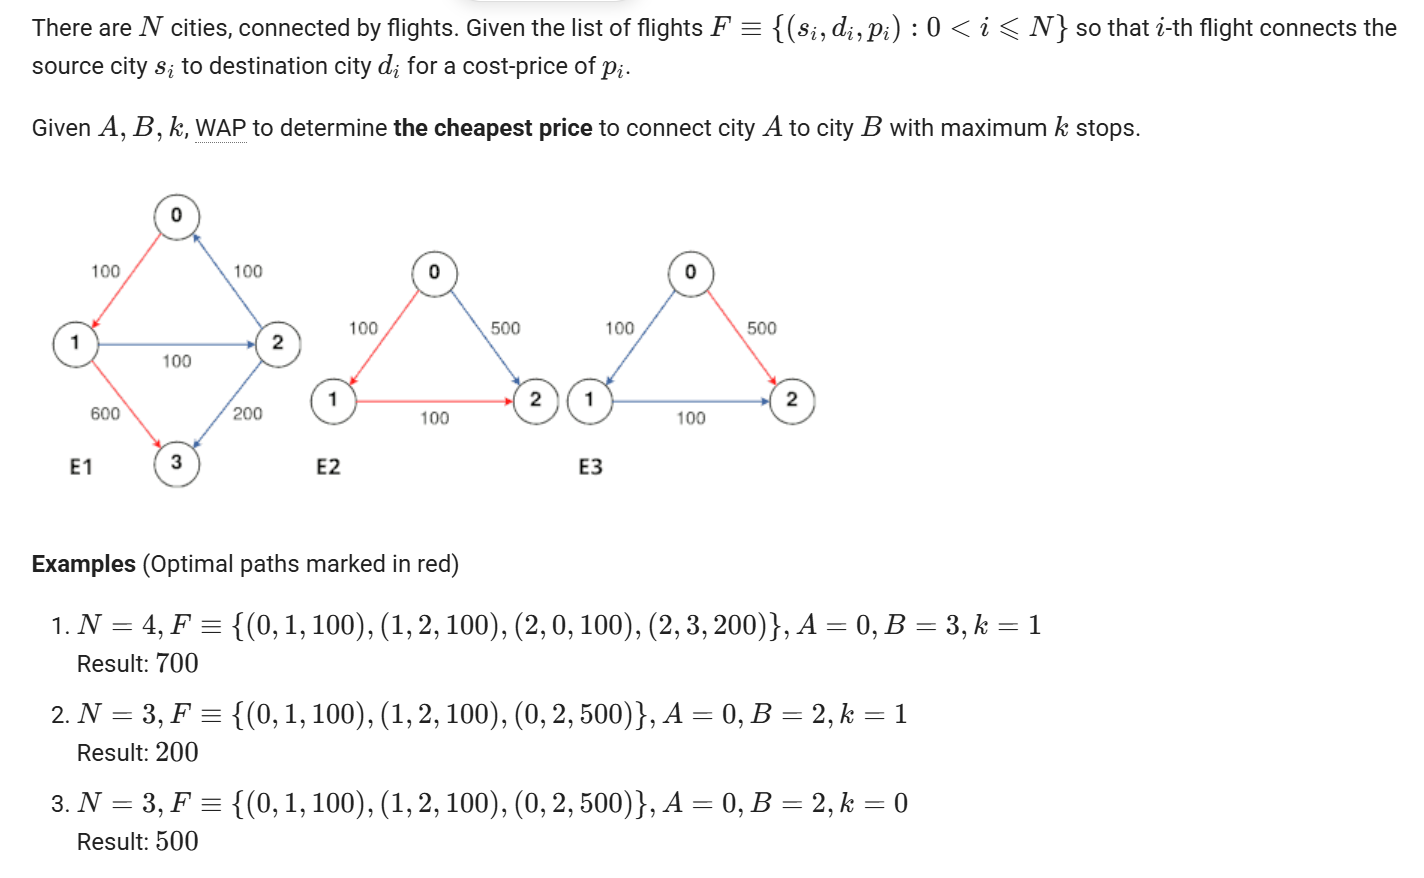

In [ ]:
from heapq import heappop, heappush
from collections import defaultdict

def find_cheapest_price(N, flights, A, B, k):
    # Step 1: Build graph
    graph = defaultdict(list)
    for src, dst, price in flights:
        graph[src].append((dst, price))

    # Step 2: Min-Heap (cost, current_city, remaining_stops)
    pq = [(0, A, k + 1)]  # (cost, source, max stops + 1)

    # Step 3: BFS with Priority Queue
    while pq:
        cost, node, stops = heappop(pq)

        # If reached destination, return cost
        if node == B:
            return cost

        # If we still have stops left, explore neighbors
        if stops > 0:
            for neighbor, price in graph[node]:
                heappush(pq, (cost + price, neighbor, stops - 1))

    return -1  # If no valid route exists

# Example Usage
N1 = 4
F1 = [(0, 1, 100), (1, 2, 100), (2, 0, 100), (2, 3, 200)]
A1, B1, k1 = 0, 3, 1  # Output: 700

N2 = 3
F2 = [(0, 1, 100), (1, 2, 100), (0, 2, 500)]
A2, B2, k2 = 0, 2, 1  # Output: 200

N3 = 3
F3 = [(0, 1, 100), (1, 2, 100), (0, 2, 500)]
A3, B3, k3 = 0, 2, 0  # Output: 500

print(find_cheapest_price(N1, F1, A1, B1, k1))  # Output: 700
print(find_cheapest_price(N2, F2, A2, B2, k2))  # Output: 200
print(find_cheapest_price(N3, F3, A3, B3, k3))  # Output: 500


-1
200
500
